---

_You are currently looking at **version 1.0** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-data-analysis/resources/0dhYG) course resource._

---

# Merging Dataframes


In [ ]:
import pandas as pd

df = pd.DataFrame([{'Name': 'Chris', 'Item Purchased': 'Sponge', 'Cost': 22.50},
                   {'Name': 'Kevyn', 'Item Purchased': 'Kitty Litter', 'Cost': 2.50},
                   {'Name': 'Filip', 'Item Purchased': 'Spoon', 'Cost': 5.00}],
                  index=['Store 1', 'Store 1', 'Store 2'])
df

In [ ]:
df['Date'] = ['December 1', 'January 1', 'mid-May']
df

In [ ]:
df['Delivered'] = True
df

In [ ]:
df['Feedback'] = ['Positive', None, 'Negative']
df

In [ ]:
adf = df.reset_index()
adf['Date'] = pd.Series({0: 'December 1', 2: 'mid-May'})
adf

In [ ]:
staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR'},
                         {'Name': 'Sally', 'Role': 'Course liasion'},
                         {'Name': 'James', 'Role': 'Grader'}])
staff_df = staff_df.set_index('Name')
student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business'},
                           {'Name': 'Mike', 'School': 'Law'},
                           {'Name': 'Sally', 'School': 'Engineering'}])
student_df = student_df.set_index('Name')
print(staff_df.head())
print()
print(student_df.head())

In [ ]:
pd.merge(staff_df, student_df, how='outer', left_index=True, right_index=True)

In [ ]:
pd.merge(staff_df, student_df, how='inner', left_index=True, right_index=True)

In [ ]:
pd.merge(staff_df, student_df, how='left', left_index=True, right_index=True)

In [ ]:
pd.merge(staff_df, student_df, how='right', left_index=True, right_index=True)

In [ ]:
staff_df = staff_df.reset_index()
student_df = student_df.reset_index()
pd.merge(staff_df, student_df, how='left', left_on='Name', right_on='Name')

In [ ]:
staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR', 'Location': 'State Street'},
                         {'Name': 'Sally', 'Role': 'Course liasion', 'Location': 'Washington Avenue'},
                         {'Name': 'James', 'Role': 'Grader', 'Location': 'Washington Avenue'}])
student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business', 'Location': '1024 Billiard Avenue'},
                           {'Name': 'Mike', 'School': 'Law', 'Location': 'Fraternity House #22'},
                           {'Name': 'Sally', 'School': 'Engineering', 'Location': '512 Wilson Crescent'}])
pd.merge(staff_df, student_df, how='left', left_on='Name', right_on='Name')

In [ ]:
staff_df = pd.DataFrame([{'First Name': 'Kelly', 'Last Name': 'Desjardins', 'Role': 'Director of HR'},
                         {'First Name': 'Sally', 'Last Name': 'Brooks', 'Role': 'Course liasion'},
                         {'First Name': 'James', 'Last Name': 'Wilde', 'Role': 'Grader'}])
student_df = pd.DataFrame([{'First Name': 'James', 'Last Name': 'Hammond', 'School': 'Business'},
                           {'First Name': 'Mike', 'Last Name': 'Smith', 'School': 'Law'},
                           {'First Name': 'Sally', 'Last Name': 'Brooks', 'School': 'Engineering'}])
staff_df
student_df
pd.merge(staff_df, student_df, how='inner', left_on=['First Name','Last Name'], right_on=['First Name','Last Name'])

# Idiomatic Pandas: Making Code Pandorable

In [ ]:
import pandas as pd
df = pd.read_csv('census.csv')
df

In [ ]:
(df.where(df['SUMLEV']==50)
    .dropna()
    .set_index(['STNAME','CTYNAME'])
    .rename(columns={'ESTIMATESBASE2010': 'Estimates Base 2010'}))

In [ ]:
df = df[df['SUMLEV']==50]
df.set_index(['STNAME','CTYNAME'], inplace=True)
df.rename(columns={'ESTIMATESBASE2010': 'Estimates Base 2010'})

In [ ]:
import numpy as np
def min_max(row):
    data = row[['POPESTIMATE2010',
                'POPESTIMATE2011',
                'POPESTIMATE2012',
                'POPESTIMATE2013',
                'POPESTIMATE2014',
                'POPESTIMATE2015']]
    return pd.Series({'min': np.min(data), 'max': np.max(data)})

In [ ]:
df.apply(min_max, axis=1)

In [ ]:
import numpy as np
def min_max(row):
    data = row[['POPESTIMATE2010',
                'POPESTIMATE2011',
                'POPESTIMATE2012',
                'POPESTIMATE2013',
                'POPESTIMATE2014',
                'POPESTIMATE2015']]
    row['max'] = np.max(data)
    row['min'] = np.min(data)
    return row
df.apply(min_max, axis=1)

In [ ]:
rows = ['POPESTIMATE2010',
        'POPESTIMATE2011',
        'POPESTIMATE2012',
        'POPESTIMATE2013',
        'POPESTIMATE2014',
        'POPESTIMATE2015']
df.apply(lambda x: np.max(x[rows]), axis=1)

# Group by

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('census.csv')
df = df[df['SUMLEV']==50]
df

In [ ]:
%%timeit -n 10
for state in df['STNAME'].unique():
    avg = np.average(df.where(df['STNAME']==state).dropna()['CENSUS2010POP'])
    print('Counties in state ' + state + ' have an average population of ' + str(avg))

In [ ]:
%%timeit -n 10
for group, frame in df.groupby('STNAME'):
    avg = np.average(frame['CENSUS2010POP'])
    print('Counties in state ' + group + ' have an average population of ' + str(avg))

In [ ]:
df.head()

In [ ]:
df = df.set_index('STNAME')

def fun(item):
    if item[0]<'M':
        return 0
    if item[0]<'Q':
        return 1
    return 2

for group, frame in df.groupby(fun):
    print('There are ' + str(len(frame)) + ' records in group ' + str(group) + ' for processing.')


In [ ]:
df = pd.read_csv('census.csv')
df = df[df['SUMLEV']==50]

In [ ]:
df.groupby('STNAME').agg({'CENSUS2010POP': np.average})

In [ ]:
print(type(df.groupby(level=0)['POPESTIMATE2010','POPESTIMATE2011']))
print(type(df.groupby(level=0)['POPESTIMATE2010']))

In [ ]:
(df.set_index('STNAME').groupby(level=0)['CENSUS2010POP']
    .agg({'avg': np.average, 'sum': np.sum}))

In [ ]:
(df.set_index('STNAME').groupby(level=0)['POPESTIMATE2010','POPESTIMATE2011']
    .agg({'avg': np.average, 'sum': np.sum}))

In [ ]:
(df.set_index('STNAME').groupby(level=0)['POPESTIMATE2010','POPESTIMATE2011']
    .agg({'POPESTIMATE2010': np.average, 'POPESTIMATE2011': np.sum}))

# Scales

In [ ]:
df = pd.DataFrame(['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D'],
                  index=['excellent', 'excellent', 'excellent', 'good', 'good', 'good', 'ok', 'ok', 'ok', 'poor', 'poor'])
df.rename(columns={0: 'Grades'}, inplace=True)
df

In [ ]:
df['Grades'].astype('category').head()

In [ ]:
grades = df['Grades'].astype('category',
                             categories=['D', 'D+', 'C-', 'C', 'C+', 'B-', 'B', 'B+', 'A-', 'A', 'A+'],
                             ordered=True)
grades.head()

In [ ]:
grades > 'C'

In [ ]:
df = pd.read_csv('census.csv')
df = df[df['SUMLEV']==50]
df = df.set_index('STNAME').groupby(level=0)['CENSUS2010POP'].agg({'avg': np.average})
pd.cut(df['avg'],10)

# Pivot Tables

In [ ]:
#http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64
df = pd.read_csv('cars.csv')

In [ ]:
df.head()

In [ ]:
df.pivot_table(values='(kW)', index='YEAR', columns='Make', aggfunc=np.mean)

In [ ]:
df.pivot_table(values='(kW)', index='YEAR', columns='Make', aggfunc=[np.mean,np.min], margins=True)

# Date Functionality in Pandas

In [ ]:
import pandas as pd
import numpy as np

### Timestamp

In [ ]:
pd.Timestamp('9/1/2016 10:05AM')

### Period

In [ ]:
pd.Period('1/2016')

In [ ]:
pd.Period('3/5/2016')

### DatetimeIndex

In [ ]:
t1 = pd.Series(list('abc'), [pd.Timestamp('2016-09-01'), pd.Timestamp('2016-09-02'), pd.Timestamp('2016-09-03')])
t1

In [ ]:
type(t1.index)

### PeriodIndex

In [ ]:
t2 = pd.Series(list('def'), [pd.Period('2016-09'), pd.Period('2016-10'), pd.Period('2016-11')])
t2

In [ ]:
type(t2.index)

### Converting to Datetime

In [ ]:
d1 = ['2 June 2013', 'Aug 29, 2014', '2015-06-26', '7/12/16']
ts3 = pd.DataFrame(np.random.randint(10, 100, (4,2)), index=d1, columns=list('ab'))
ts3

In [ ]:
ts3.index = pd.to_datetime(ts3.index)
ts3

In [ ]:
pd.to_datetime('4.7.12', dayfirst=True)

### Timedeltas

In [ ]:
pd.Timestamp('9/3/2016')-pd.Timestamp('9/1/2016')

In [ ]:
pd.Timestamp('9/2/2016 8:10AM') + pd.Timedelta('12D 3H')

### Working with Dates in a Dataframe

In [52]:
dates = pd.date_range('10-01-2016', periods=9, freq='2W-SUN')
dates

DatetimeIndex(['2016-10-02', '2016-10-16', '2016-10-30', '2016-11-13',
               '2016-11-27', '2016-12-11', '2016-12-25', '2017-01-08',
               '2017-01-22'],
              dtype='datetime64[ns]', freq='2W-SUN')

In [53]:
df = pd.DataFrame({'Count 1': 100 + np.random.randint(-5, 10, 9).cumsum(),
                  'Count 2': 120 + np.random.randint(-5, 10, 9)}, index=dates)
df

,Count 1,Count 2
2016-10-02,98,119
2016-10-16,93,121
2016-10-30,91,116
2016-11-13,97,124
2016-11-27,94,119
2016-12-11,101,121
2016-12-25,101,124
2017-01-08,99,119
2017-01-22,95,117


In [54]:
df.index.weekday_name

Index(['Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday',
       'Sunday', 'Sunday'],
      dtype='object')

In [55]:
df.diff()

,Count 1,Count 2
2016-10-02,NaN,NaN
2016-10-16,-5.0,2.0
2016-10-30,-2.0,-5.0
2016-11-13,6.0,8.0
2016-11-27,-3.0,-5.0
2016-12-11,7.0,2.0
2016-12-25,0.0,3.0
2017-01-08,-2.0,-5.0
2017-01-22,-4.0,-2.0


In [56]:
df.resample('M').mean()

,Count 1,Count 2
2016-10-31,94.0,118.666667
2016-11-30,95.5,121.500000
2016-12-31,101.0,122.500000
2017-01-31,97.0,118.000000


In [57]:
df['2017']

,Count 1,Count 2
2017-01-08,99,119
2017-01-22,95,117


In [58]:
df['2016-12']

,Count 1,Count 2
2016-12-11,101,121
2016-12-25,101,124


In [59]:
df['2016-12':]

,Count 1,Count 2
2016-12-11,101,121
2016-12-25,101,124
2017-01-08,99,119
2017-01-22,95,117


In [60]:
df.asfreq('W', method='ffill')

,Count 1,Count 2
2016-10-02,98,119
2016-10-09,98,119
2016-10-16,93,121
2016-10-23,93,121
2016-10-30,91,116
2016-11-06,91,116
2016-11-13,97,124
2016-11-20,97,124
2016-11-27,94,119
2016-12-04,94,119


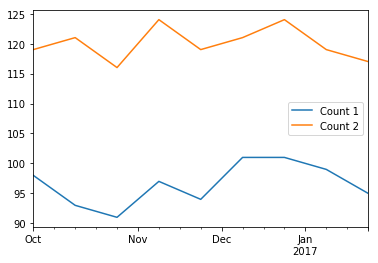

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline

df.plot()